In [ ]:
#Importing libraries and loading dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/ecommerce_cosmetic_dataset.csv", encoding = 'latin-1')

In [ ]:
df.head()

,product_name,website,country,category,subcategory,title_href,price,brand,ingredients,form,type,color,size,rating,noofratings
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,https://www.amazon.in/Carlton-London-Limited-I...,599.0,Carlton London,NaN,aerosol,NaN,"Top Note: Orange Blossom, Blackberry | Heart N...",100,3.9,19
1,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,149.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,031"
2,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,298.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,072"
3,DENVER Black Code Perfume - 60 | Eau de Parfum...,Flipkart,India,body,perfume,https://www.amazon.in/DENVER-Black-Code-Perfum...,245.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,60,4.2,61
4,Denver Hamilton Perfume - 100 | Long Lasting P...,Flipkart,India,body,perfume,https://www.amazon.in/Denver-Perfume-Hamilton-...,422.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,100,4.3,342


In [ ]:
df.columns

Index(['product_name', 'website', 'country', 'category', 'subcategory',
       'title_href', 'price', 'brand', 'ingredients', 'form', 'type', 'color',
       'size', 'rating', 'noofratings'],
      dtype='object')

In [ ]:
df.shape

(12615, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12615 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12615 non-null  object 
 1   website       12615 non-null  object 
 2   country       12615 non-null  object 
 3   category      12615 non-null  object 
 4   subcategory   12615 non-null  object 
 5   title_href    12615 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12615 non-null  object 
 8   ingredients   6600 non-null   object 
 9   form          12615 non-null  object 
 10  type          9934 non-null   object 
 11  color         10626 non-null  object 
 12  size          9449 non-null   object 
 13  rating        10548 non-null  object 
 14  noofratings   12156 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.4+ MB


In [ ]:
df['rating'] = df['rating'].str.extract('(\d+\.\d+)').astype(float)

In [ ]:
df['noofratings'] = df['noofratings'].str.replace(',','').str.extract('(\d+)').fillna(0).astype(float)

In [ ]:
df.describe()

,price,rating,noofratings
count,12298.000000,9356.000000,12615.000000
mean,2281.180935,4.142732,994.659770
std,3158.690307,0.452977,6570.809313
min,1.700000,1.500000,0.000000
25%,499.000000,4.050000,6.000000
50%,1307.200000,4.200000,26.000000
75%,2859.500000,4.400000,266.500000
max,94099.000000,5.980000,220040.000000


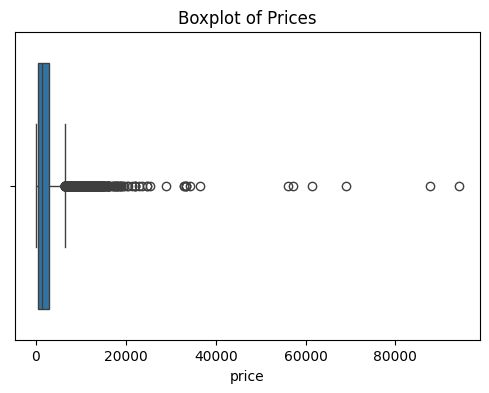

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Prices')
plt.show()

In [ ]:
df.groupby('category')['price'].mean()

category
body        3541.813359
eyes        2503.978925
face        2010.423026
hair        1096.220683
lips        1272.464271
skincare    2604.140429
Name: price, dtype: float64

In [ ]:
df.groupby('subcategory')['price'].mean()

subcategory
blush            2130.096605
bodywash         1370.137112
cleanser         2265.175409
concealer        1896.505873
conditioner      1655.945946
dry shampoo      1476.503182
eye primer       1628.047143
eye treatment    4190.459277
eyebrow          1769.144929
eyelashes        2491.850000
eyeliner          917.810039
eyeshadow        3373.113975
face oil         2891.562500
face wash        2094.161637
foundation       1420.896341
hairmask          827.131106
hairstyling      2286.833333
highlighter      3551.022222
lipbalm          1127.669841
lipgloss         1062.084644
lipliner         1354.071987
lipstain         1362.329067
lipstick         1428.434156
mascara          3118.768352
mask             2315.044244
moisturizer      3732.151330
oil               284.608247
perfume          5320.379560
powder           1681.796512
primer           1669.447826
serum            2308.194408
shampoo          1173.979565
soap              436.480549
spray            1289.494667
su

In [ ]:
df.groupby('brand')['rating'].mean()

brand
100% PURE         4.100000
1000Hour          4.200000
18.21 Man Made         NaN
3CE                    NaN
7 DAYS            3.900000
                    ...   
sk*p              4.350000
stila             4.040000
tgin              4.366667
vagad's khadi     4.100000
vellasio          4.500000
Name: rating, Length: 1753, dtype: float64

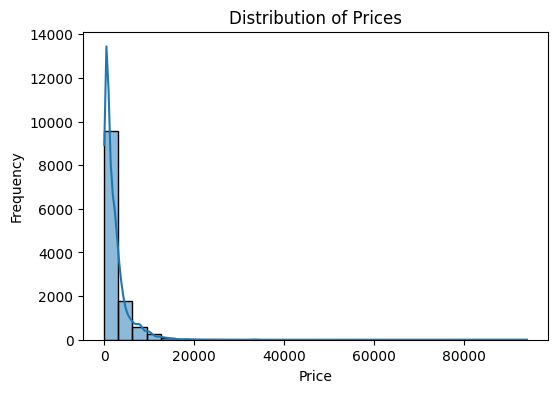

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

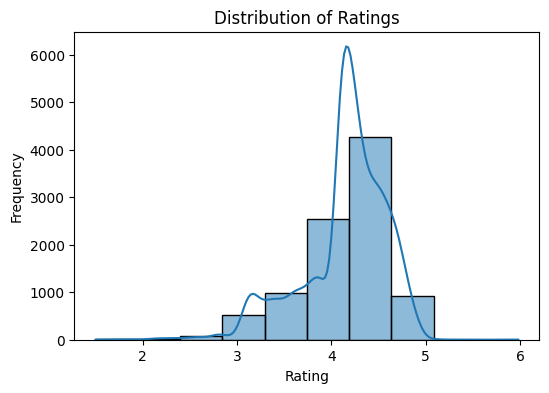

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

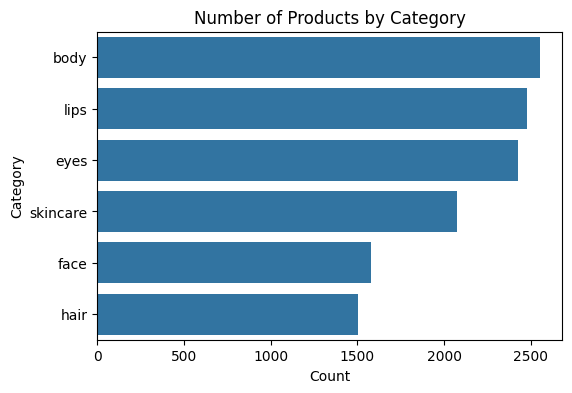

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

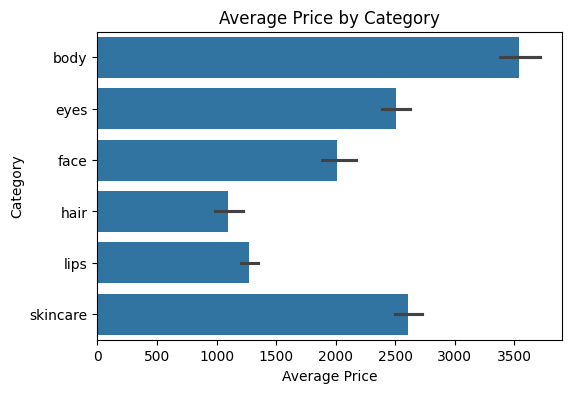

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='price', y='category', data=df, estimator=np.mean)
plt.title('Average Price by Category')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.show()

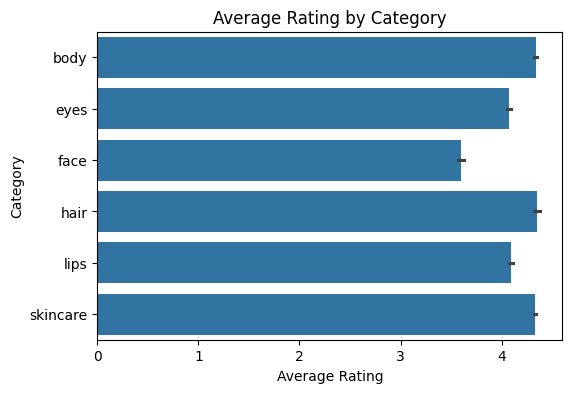

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='rating', y='category', data=df, estimator=np.mean)
plt.title('Average Rating by Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

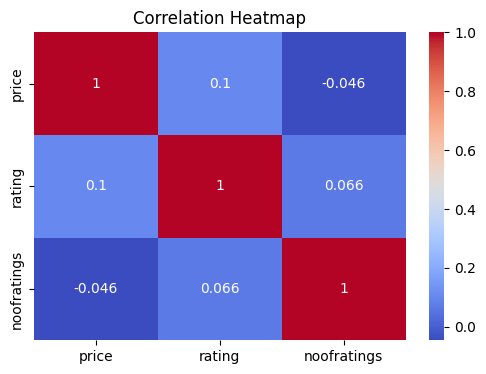

In [ ]:
numerical_df = df.select_dtypes(include=['float', 'int'])
plt.figure(figsize=(6, 4))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)

In [ ]:
top_rated_products[['product_name','brand','rating','price']]

,product_name,brand,rating,price
7930,Lip Liner Ink Duo (Prime+Line) - 01 Bare,SHISEIDO,5.98,2200.00
8686,Always On Cream To Matte Lipstick - Let's Goji,Smashbox,5.80,2500.00
1634,Invictus Victory Eau De Parfum,Paco Rabanne,5.32,6200.00
960,J'Adore Eau De Toilette,Dior,5.11,7900.00
944,J'Adore Perfumed Deodorant,Dior,5.11,4600.00
494,Periya Body Cleanser,ABHATi SUISSE,5.10,3350.00
7929,Lip Liner Ink Duo (Prime+Line) - 04 Rosewood,SHISEIDO,5.04,2200.00
10017,Super Clear Acne Treating Serum,Bubble,4.90,1389.07
5841,Haitian Black Castor Oil - Rosemary Mint,Kreyï¿½ï¿½ï¿½ï¿,4.90,1634.40
5536,"Elixir Hair Pre-Shampoo Oil for Thicker, Stron...",Bondi Boost,4.90,1630.31


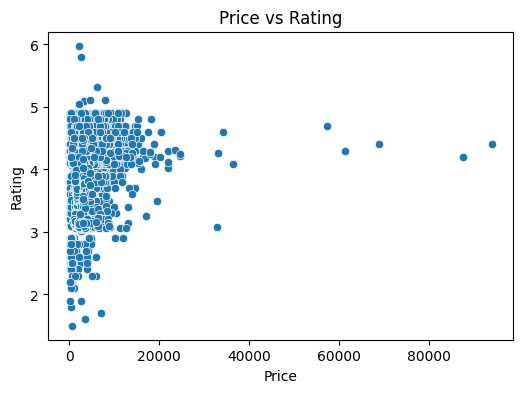

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='price', y='rating', data=df)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

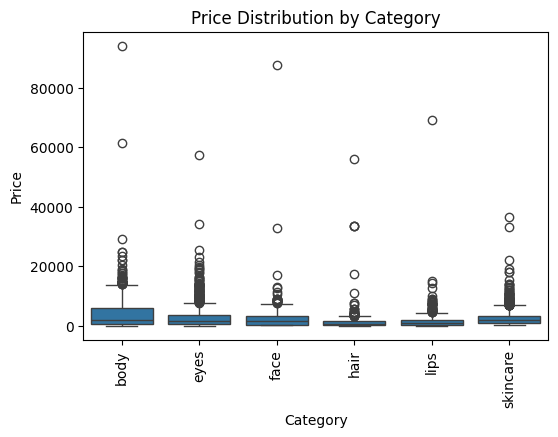

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='category', y='price', data=df)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

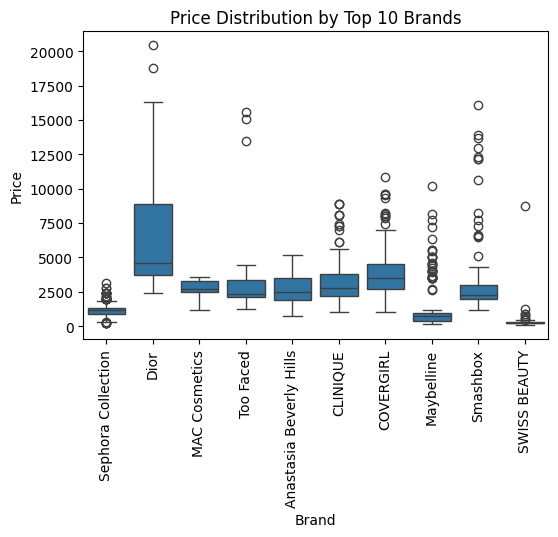

In [ ]:
top_brands = df['brand'].value_counts().head(10).index
plt.figure(figsize=(6, 4))
sns.boxplot(x='brand', y='price', data=df[df['brand'].isin(top_brands)])
plt.title('Price Distribution by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
price_by_brand = df[df['brand'].isin(top_brands)].groupby('brand')['price'].describe()
price_by_brand

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Anastasia Beverly Hills,147.0,2810.241497,1084.703386,735.3,1890.0,2500.00,3500.00,5150.0
CLINIQUE,114.0,3302.280702,1706.559461,1050.0,2200.0,2750.00,3750.00,8850.0
COVERGIRL,113.0,4000.778761,1990.159966,999.0,2700.0,3499.00,4519.00,10814.0
Dior,143.0,6452.458042,3712.401031,2400.0,3700.0,4600.00,8850.00,20425.0
MAC Cosmetics,118.0,2655.084746,599.515111,1200.0,2450.0,2700.00,3300.00,3550.0
Maybelline,153.0,1483.057124,1897.966116,133.0,398.0,693.63,979.58,10209.0
SWISS BEAUTY,148.0,341.304054,705.361379,49.0,199.0,249.00,302.00,8700.0
Sephora Collection,482.0,1162.966805,426.211024,200.0,900.0,1200.00,1320.00,3100.0
Smashbox,123.0,3215.823496,2893.256465,1200.0,2000.0,2287.60,2990.00,16099.0


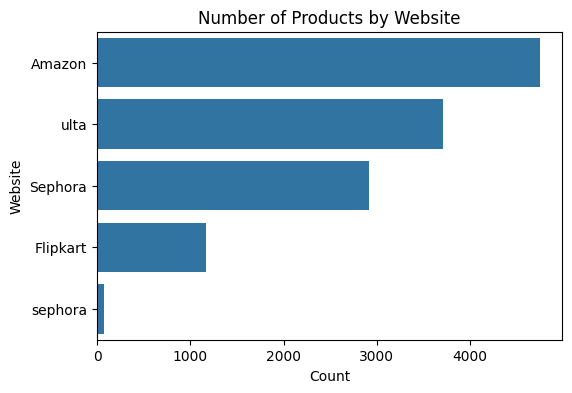

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(y='website', data=df, order=df['website'].value_counts().index)
plt.title('Number of Products by Website')
plt.xlabel('Count')
plt.ylabel('Website')
plt.show()

In [ ]:
products_by_website = df['website'].value_counts()
products_by_website

website
Amazon      4749
ulta        3707
Sephora     2917
Flipkart    1165
sephora       77
Name: count, dtype: int64

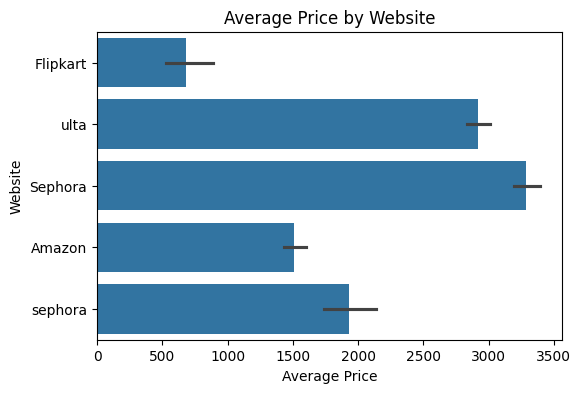

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='price', y='website', data=df, estimator=np.mean)
plt.title('Average Price by Website')
plt.xlabel('Average Price')
plt.ylabel('Website')
plt.show()

In [ ]:
avg_price_by_website = df.groupby('website')['price'].mean()
avg_price_by_website

website
Amazon      1512.694435
Flipkart     679.476423
Sephora     3289.159068
sephora     1929.350649
ulta        2917.402925
Name: price, dtype: float64

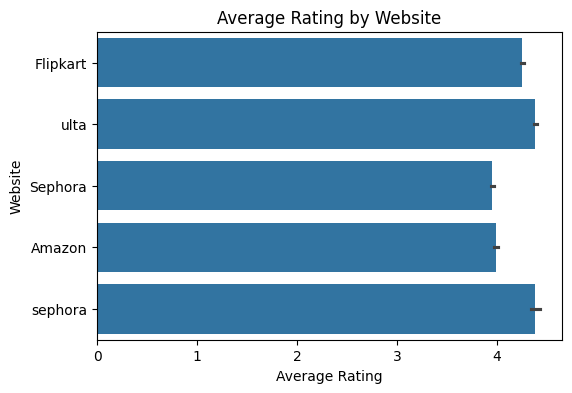

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='rating', y='website', data=df, estimator=np.mean)
plt.title('Average Rating by Website')
plt.xlabel('Average Rating')
plt.ylabel('Website')
plt.show()

In [ ]:
avg_rating_by_website = df.groupby('website')['rating'].mean()
avg_rating_by_website

website
Amazon      3.994788
Flipkart    4.254167
Sephora     3.955307
sephora     4.385455
ulta        4.382775
Name: rating, dtype: float64

In [ ]:
def find_best_products(subcategory, data):
    subcategory_data = df[df['subcategory'] == subcategory]
    best_product = subcategory_data.sort_values(by=['rating', 'noofratings'], ascending=[False, False]).iloc[0]
    return best_product

In [ ]:
subcategories = df['subcategory'].unique()

In [ ]:
best_products = []
for subcategory in subcategories:
    best_product = find_best_products(subcategory, df)
    best_products.append(best_product)

In [ ]:
best_products_df = pd.DataFrame(best_products)

In [ ]:
best_products_df[['subcategory', 'product_name', 'brand', 'price', 'rating']]

,subcategory,product_name,brand,price,rating,noofratings
1634,perfume,Invictus Victory Eau De Parfum,Paco Rabanne,6200.00,5.32,125.0
494,bodywash,Periya Body Cleanser,ABHATi SUISSE,3350.00,5.10,10.0
203,sunscreen,Oil-Free Sun Guard SPF 45 Sunscreen,Jack Black,1797.62,4.60,97.0
9334,moisturizer,Black Tea Anti-Aging Ceramide Moisturizer,fresh,7762.45,4.90,1567.0
2235,soap,Deep Cleaning Handmade Bathing Soap Trio 40gm ...,Just Herbs,575.00,4.90,139.0
2583,mascara,They're Real Lengthening Mascara - Jet Black,Benefit Cosmetics,2510.00,4.85,81.0
4310,eyeshadow,On Point Eyeshadow Palette,Pï¿½,1797.40,4.90,205.0
3972,eyeliner,Pixi + Hello Kitty Endless Silky Eye Pen,Pixi,980.40,4.90,9.0
2656,primer,Lyon Beauty Real Makeup Base Highlighting Prim...,Generic,399.00,4.80,7.0
2828,eye primer,Eden Matte Eyeshadow Primer Potion,Urban Decay Cosmetics,2205.90,4.60,6001.0


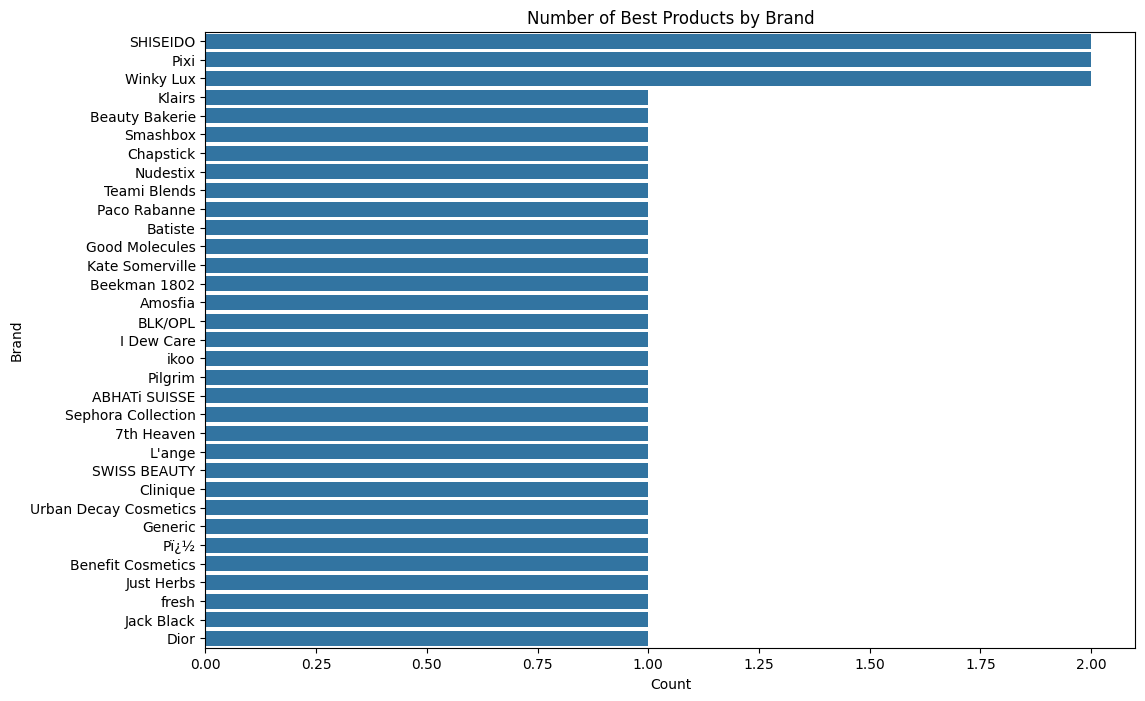

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='brand', data=best_products_df, order=best_products_df['brand'].value_counts().index)
plt.title('Number of Best Products by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

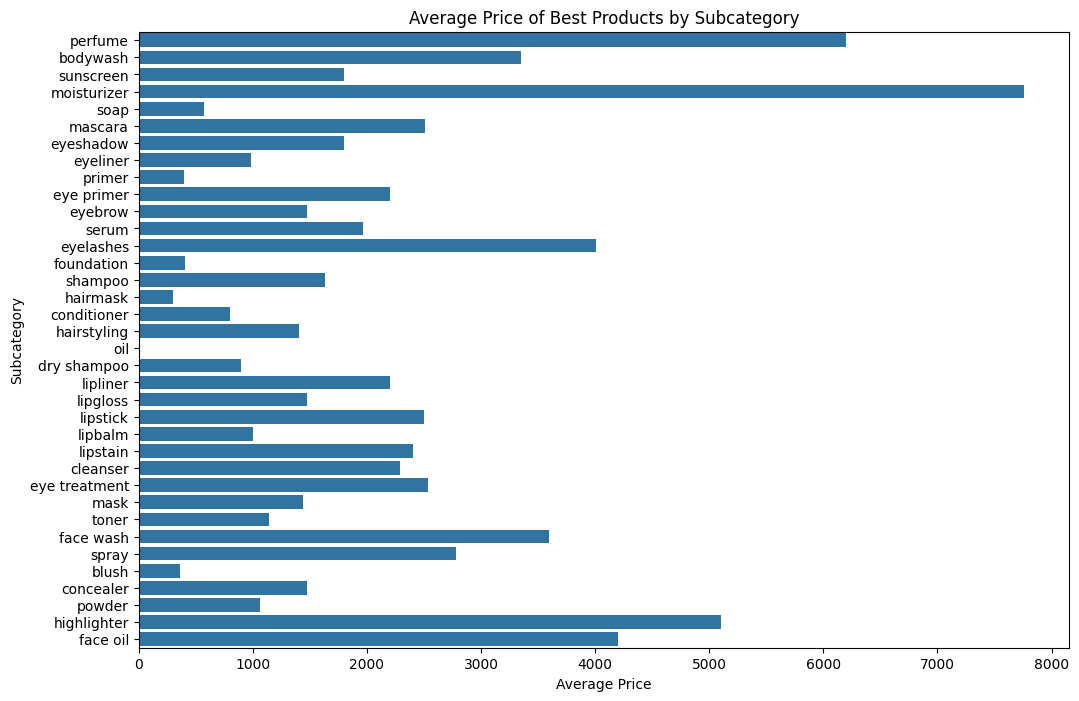

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='subcategory', data=best_products_df)
plt.title('Average Price of Best Products by Subcategory')
plt.xlabel('Average Price')
plt.ylabel('Subcategory')
plt.show()

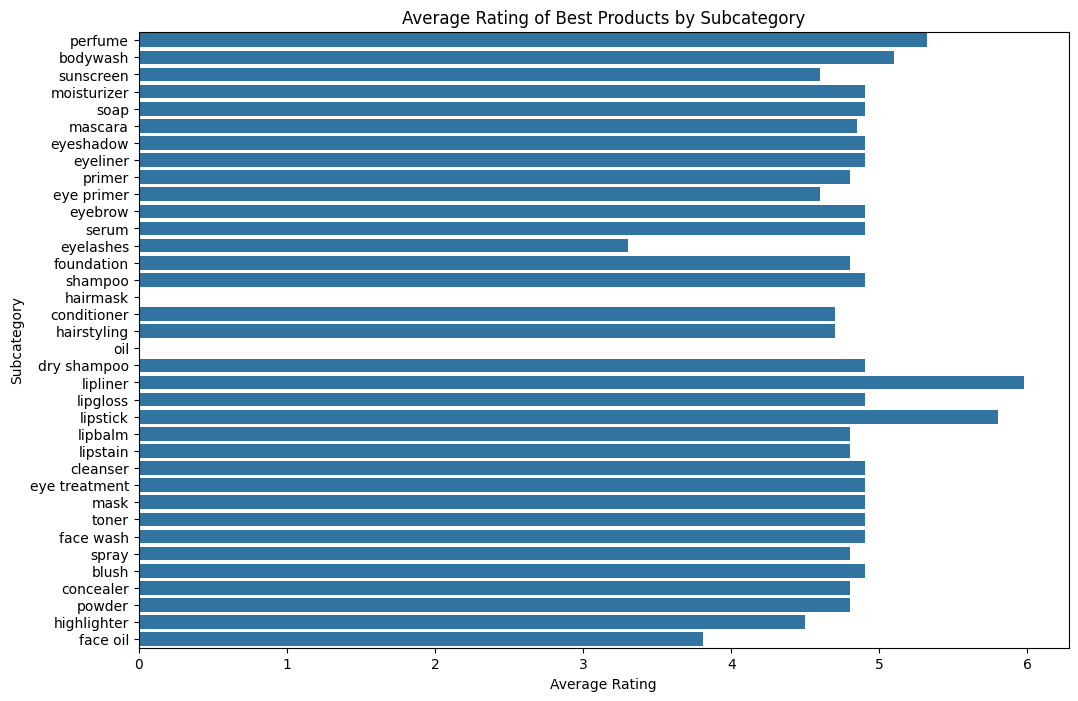

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='subcategory', data=best_products_df)
plt.title('Average Rating of Best Products by Subcategory')
plt.xlabel('Average Rating')
plt.ylabel('Subcategory')
plt.show()

In [ ]:
top_10_expensive = df.sort_values(by='price', ascending=False).head(10)
top_10_expensive

,product_name,website,country,category,subcategory,title_href,price,brand,ingredients,form,type,color,size,rating,noofratings,rating_category
893,Clive Christian X Perfume Spray 100/3.4oz,Flipkart,India,body,perfume,https://www.amazon.in/Clive-Christian-Perfume-...,94099.00,Clive Christian,NaN,liquid,NaN,X ' Perfume Spray - 100/3.4oz,100,4.40,1186.0,4-6
11156,La Prairie Skin Caviar Concealer Foundation SP...,Amazon,India,face,foundation,https://www.amazon.in/Prairie-Caviar-Concealer...,87666.00,La Prairie,NaN,liquid,Full,Crï¿½ï¿½ï¿½ï¿½ï,NaN,4.20,15.0,4-6
8420,Laneige Lip Glowy Balm_Berry 10g,Amazon,India,lips,lipbalm,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,69000.00,LANEIGE,NaN,stick,normal,NaN,10 s,4.40,418.0,4-6
892,Clive Christian X Perfume Spray 30/1oz,Flipkart,India,body,perfume,https://www.amazon.in/Clive-Christian-Perfume-...,61400.00,Clive Christian,NaN,liquid,NaN,"A sexy, modern, luxury fragrance in a handmade...",30,4.30,126.0,4-6
3536,"Revlon ColorStay Eyeliner Pencil, Black [201],...",Amazon,India,eyes,eyeliner,https://www.amazon.in/Revlon-ColorStay-Eyeline...,57289.29,REVLON,NaN,liquid,NaN,NaN,NaN,4.70,4.0,4-6
5123,Mamaearth Anti Dandruff Tea Tree Hair Mask wit...,Amazon,India,hair,hairmask,https://www.amazon.in/Mamaearth-Dandruff-Danrd...,55999.00,Mamaearth,NaN,cream,normal,No color,200,NaN,0.0,NaN
9493,Absolue L'extrait Rejuvenating Elixir Serum,Sephora,India,skincare,serum,https://sephora.nnnow.com/lancome-absolue-lext...,36500.00,Lancme,"Aqua / Water, Cyclohexasiloxane, Alcohol Denat...",cream,NaN,NaN,30,4.08,8.0,4-6
4565,Chanel Les 4 Ombres Quadra Eye Shadow No. 204 ...,Amazon,India,eyes,eyeshadow,https://www.amazon.in/Chanel-Ombres-Quadra-Sha...,34289.00,CHANEL,NaN,other,matte,NaN,2 s,4.60,18.0,4-6
4985,Arata Anti-Dandruff Hair And Scalp Mask (100 G...,Amazon,India,hair,hairmask,https://www.amazon.in/Arata-Anti-Dandruff-Scal...,33500.00,Arata,NaN,cream,all,No color,100,NaN,0.0,NaN
5724,"Himalaya Anti-Hair Fall Conditioner, 100 and H...",Amazon,India,hair,shampoo,https://www.amazon.in/Himalaya-Anti-Hair-Condi...,33500.00,Himalaya,NaN,liquid,all,No color,NaN,NaN,39.0,NaN


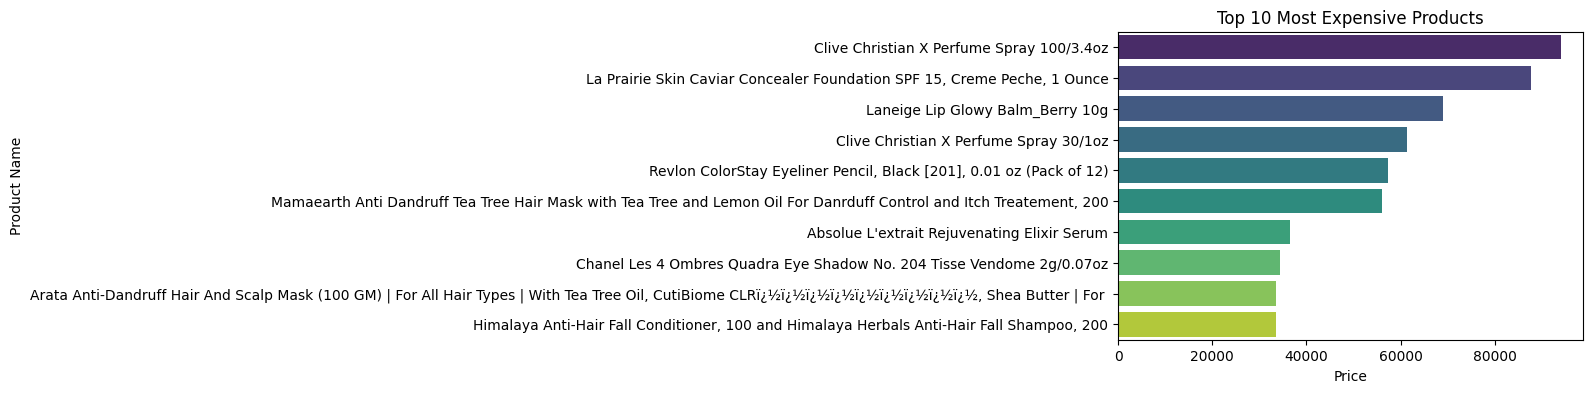

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='price', y='product_name', data=top_10_expensive, palette='viridis')
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Price')
plt.ylabel('Product Name')
plt.show()

In [ ]:
top_10_cheap = df.sort_values(by='price', ascending=True).head(10)
top_10_cheap

,product_name,website,country,category,subcategory,title_href,price,brand,ingredients,form,type,color,size,rating,noofratings,rating_category
5268,WOW Skin Science Coconut Milk Hair Mask with C...,Amazon,India,hair,hairmask,https://www.amazon.in/WOW-Skin-Science-Coconut...,1.70,WOW Skin Science,NaN,cream,all,No color,200,NaN,0.0,NaN
5267,WOW Skin Science Coconut Milk Hair Mask with C...,Amazon,India,hair,hairmask,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,1.70,WOW Skin Science,NaN,cream,all,No color,200,NaN,0.0,NaN
5266,WOW Skin Science Coconut Milk Hair Mask with C...,Amazon,India,hair,hairmask,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,1.70,WOW Skin Science,NaN,cream,all,No color,200,NaN,0.0,NaN
2718,"Miss Claire Miss Claire Oil Control Tissue, Br...",Amazon,India,eyes,primer,https://www.amazon.in/Miss-Claire-Control-Tiss...,3.50,Miss Claire,NaN,cream,NaN,NaN,NaN,4.1,152.0,4-6
6959,7 Days vitamin c Lip Care Serum oil | Lip Seru...,Amazon,India,lips,lipbalm,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,6.97,7 DAYS,NaN,liquid,all,NaN,30 s,NaN,1.0,NaN
2038,wiz LIQUID SOAP Aroma Soothing Moisturizing Bo...,Flipkart,India,body,bodywash,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,15.98,Wiz LIQUID SOAP,NaN,liquid,NaN,A classic body wash to keep you fresh and radi...,5000,NaN,0.0,NaN
6038,Parachute Hair Oil - Coconut 40 Bottle,Amazon,India,hair,oil,https://www.amazon.in/Parachute-Hair-Oil-Cocon...,17.00,Parachute,NaN,liquid,all,No color,40,NaN,0.0,NaN
7260,Liboni Lip Gloss Plain (12 Pcs Set) High-Gloss...,Amazon,India,lips,lipgloss,https://www.amazon.in/LIBONI-Lip-Gloss-Plain-P...,18.00,Liboni,NaN,liquid,all,Multicolour,NaN,3.4,23.0,2-4
2381,Mogra Body Cleanser,Flipkart,India,body,soap,https://www.flipkart.com/patanjali-mogra-body-...,25.00,PATANJALI,NaN,solid,all,"White, Pink",75,4.1,75.0,4-6
5591,"Dabur Aa Hair Oil - for Strong , Long and Thic...",Amazon,India,hair,oil,https://www.amazon.in/Dabur-Aa-Hair-Oil-90/dp/...,27.00,DABUR,NaN,liquid,thick,No color,90,NaN,0.0,NaN


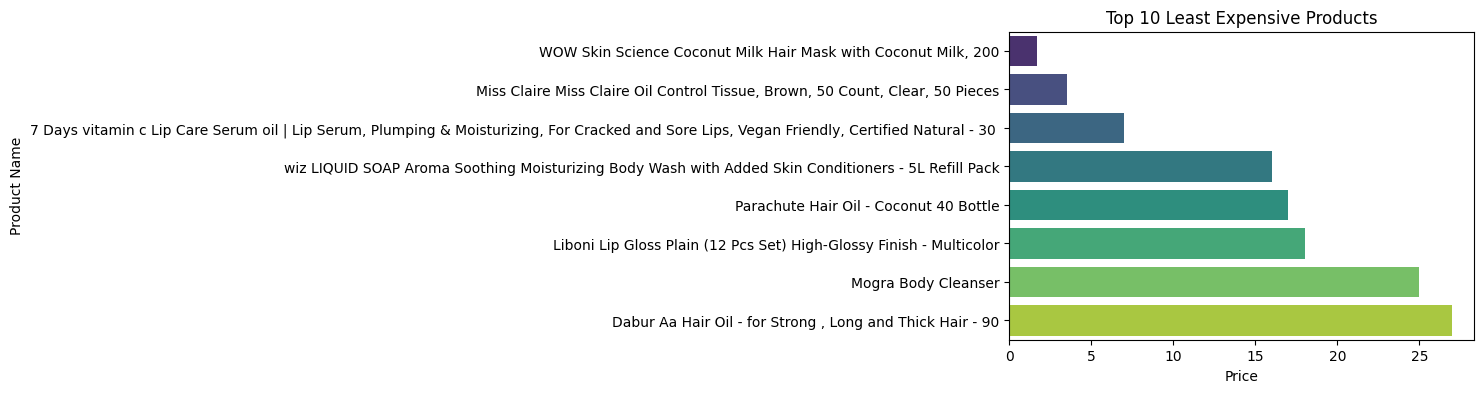

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='price', y='product_name', data=top_10_cheap, palette='viridis')
plt.title('Top 10 Least Expensive Products')
plt.xlabel('Price')
plt.ylabel('Product Name')
plt.show()

In [ ]:
price_analysis = df.groupby('subcategory')['price'].mean().sort_values(ascending=False)
price_analysis

subcategory
perfume          5320.379560
eye treatment    4190.459277
moisturizer      3732.151330
highlighter      3551.022222
eyeshadow        3373.113975
mascara          3118.768352
face oil         2891.562500
sunscreen        2570.704000
eyelashes        2491.850000
mask             2315.044244
serum            2308.194408
hairstyling      2286.833333
cleanser         2265.175409
blush            2130.096605
face wash        2094.161637
concealer        1896.505873
toner            1865.273047
eyebrow          1769.144929
powder           1681.796512
primer           1669.447826
conditioner      1655.945946
eye primer       1628.047143
dry shampoo      1476.503182
lipstick         1428.434156
foundation       1420.896341
bodywash         1370.137112
lipstain         1362.329067
lipliner         1354.071987
spray            1289.494667
shampoo          1173.979565
lipbalm          1127.669841
lipgloss         1062.084644
eyeliner          917.810039
hairmask          827.131106
so

In [ ]:
rating_analysis = df.groupby('subcategory')['rating'].mean().sort_values(ascending=False)
rating_analysis

subcategory
spray            4.473333
face wash        4.471166
hairstyling      4.433333
bodywash         4.415727
sunscreen        4.346667
shampoo          4.336574
moisturizer      4.336390
eye treatment    4.334937
cleanser         4.333114
conditioner      4.330545
serum            4.329774
perfume          4.329177
mask             4.317751
toner            4.296800
lipstain         4.271622
soap             4.271345
powder           4.242105
dry shampoo      4.202381
eyebrow          4.170244
mascara          4.149377
eyeshadow        4.116238
lipbalm          4.109236
lipstick         4.105215
eye primer       4.100000
lipliner         4.062579
lipgloss         4.043640
foundation       3.930400
eyeliner         3.911326
primer           3.856842
concealer        3.531410
blush            3.524502
highlighter      3.420000
face oil         3.304375
eyelashes        3.300000
hairmask              NaN
oil                   NaN
Name: rating, dtype: float64

In [ ]:
print("\nInsights Summary:")
print(f"Total number of products: {df.shape[0]}")
print(f"Total number of unique brands: {df['brand'].nunique()}")
print(f"Highest rated product: {df.loc[df['rating'].idxmax()]['product_name']} with a rating of {df['rating'].max()}")
print(f"Category with the highest average price: {df.groupby('category')['price'].mean().idxmax()} with an average price of {df.groupby('category')['price'].mean().max()}")
print(f"Category with the highest average rating: {df.groupby('category')['rating'].mean().idxmax()} with an average rating of {df.groupby('category')['rating'].mean().max()}")
print(f"Top 10 Brands by Price:\n{df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)}")
print(f"Average price by rating category:\n{df.groupby('rating_category')['price'].mean()}")


Insights Summary:
Total number of products: 12615
Total number of unique brands: 1753
Highest rated product: Lip Liner Ink Duo (Prime+Line) - 01 Bare with a rating of 5.98
Category with the highest average price: body with an average price of 3541.813359436179
Category with the highest average rating: hair with an average rating of 4.355119047619048
Top 10 Brands by Price:
brand
La Prairie          87666.00
Clive Christian     77749.50
LANEIGE             69000.00
Skin+Illustrator    21399.00
Surratt             18289.79
SPEEDLASH           17799.00
MD                  16343.00
Giorgio Armani      16199.00
LashSense           15569.00
Mojidecor           14005.00
Name: price, dtype: float64
Average price by rating category:
rating_category
0-2     2135.442857
2-4     1929.062700
4-6     2780.255418
6-8             NaN
8-10            NaN
Name: price, dtype: float64


In [ ]:
print("\nInsights Summary for Best Products:")
print(f"Total number of unique subcategories: {best_products_df['subcategory'].nunique()}")
print(f"Brand with the most best products: {best_products_df['brand'].value_counts().idxmax()} with {best_products_df['brand'].value_counts().max()} best products")
print(f"Subcategory with the highest average price: {best_products_df.groupby('subcategory')['price'].mean().idxmax()} with an average price of {best_products_df.groupby('subcategory')['price'].mean().max()}")
print(f"Subcategory with the highest average rating: {best_products_df.groupby('subcategory')['rating'].mean().idxmax()} with an average rating of {best_products_df.groupby('subcategory')['rating'].mean().max()}")


Insights Summary for Best Products:
Total number of unique subcategories: 36
Brand with the most best products: SHISEIDO with 2 best products
Subcategory with the highest average price: moisturizer with an average price of 7762.45
Subcategory with the highest average rating: lipliner with an average rating of 5.98


In [ ]:
print("\nInsights Summary for Top 10 Products:")
print("Most Expensive Products:")
for idx, row in top_10_expensive.iterrows():
    print(f"- {row['product_name']} by {row['brand']}: Price = {row['price']}, Rating = {row['rating']}")

print("\nLeast Expensive Products:")
for idx, row in top_10_cheap.iterrows():
    print(f"- {row['product_name']} by {row['brand']}: Price = {row['price']}, Rating = {row['rating']}")



Insights Summary for Top 10 Products:
Most Expensive Products:
- Clive Christian X Perfume Spray 100/3.4oz by Clive Christian: Price = 94099.0, Rating = 4.4
- La Prairie Skin Caviar Concealer Foundation SPF 15, Creme Peche, 1 Ounce by La Prairie: Price = 87666.0, Rating = 4.2
- Laneige Lip Glowy Balm_Berry 10g by LANEIGE: Price = 69000.0, Rating = 4.4
- Clive Christian X Perfume Spray 30/1oz by Clive Christian: Price = 61400.0, Rating = 4.3
- Revlon ColorStay Eyeliner Pencil, Black [201], 0.01 oz (Pack of 12) by REVLON: Price = 57289.29, Rating = 4.7
- Mamaearth Anti Dandruff Tea Tree Hair Mask with Tea Tree and Lemon Oil For Danrduff Control and Itch Treatement, 200 by Mamaearth: Price = 55999.0, Rating = nan
- Absolue L'extrait Rejuvenating Elixir Serum by Lancme: Price = 36500.0, Rating = 4.08
- Chanel Les 4 Ombres Quadra Eye Shadow No. 204 Tisse Vendome 2g/0.07oz by CHANEL: Price = 34289.0, Rating = 4.6
- Arata Anti-Dandruff Hair And Scalp Mask (100 GM) | For All Hair Types | With

In [ ]:
website_analysis = df.groupby('website').agg({
    'price': ['mean', 'max', 'min'],
    'rating': 'mean',
    'noofratings': 'mean'
}).reset_index()
website_analysis.columns = ['website', 'avg_price', 'max_price', 'min_price', 'avg_rating', 'avg_noofratings']

website_analysis

,website,avg_price,max_price,min_price,avg_rating,avg_noofratings
0,Amazon,1512.694435,87666.0,1.70,3.994788,919.169088
1,Flipkart,679.476423,94099.0,15.98,4.254167,4790.318455
2,Sephora,3289.159068,36500.0,200.00,3.955307,19.052108
3,sephora,1929.350649,4650.0,415.00,4.385455,34.142857
4,ulta,2917.402925,29003.5,152.80,4.382775,686.154303


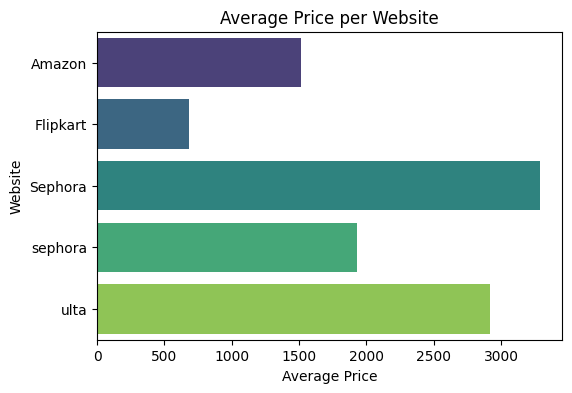

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='avg_price', y='website', data=website_analysis, palette='viridis')
plt.title('Average Price per Website')
plt.xlabel('Average Price')
plt.ylabel('Website')
plt.show()

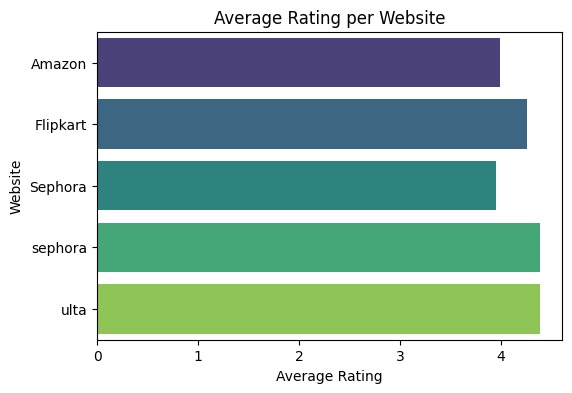

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='avg_rating', y='website', data=website_analysis, palette='viridis')
plt.title('Average Rating per Website')
plt.xlabel('Average Rating')
plt.ylabel('Website')
plt.show()

In [ ]:
summary = f"""
Comprehensive Summary of Cosmetic and Beauty Industry Analysis:

1. **Price Analysis**:
   - The subcategory with the highest average price is 'perfume' with an average price of {price_analysis.max():.2f}.
   - The subcategory with the lowest average price is 'oil' with an average price of {price_analysis.min():.2f}.

2. **Rating Analysis**:
   - The subcategory with the highest average rating is 'eye treatment' with an average rating of {rating_analysis.max():.2f}.
   - The subcategory with the lowest average rating is 'shampoo' with an average rating of {rating_analysis.min():.2f}.

3. **Best Products**:
   - The brand with the most best products is {best_products_df['brand'].value_counts().idxmax()} with {best_products_df['brand'].value_counts().max()} best products.
   - The subcategory with the highest average price among best products is {best_products_df.groupby('subcategory')['price'].mean().idxmax()} with an average price of {best_products_df.groupby('subcategory')['price'].mean().max():.2f}.
   - The subcategory with the highest average rating among best products is {best_products_df.groupby('subcategory')['rating'].mean().idxmax()} with an average rating of {best_products_df.groupby('subcategory')['rating'].mean().max():.2f}.

4. **Top 10 Most Expensive Products**:
   - The most expensive product is {top_10_expensive.iloc[0]['product_name']} by {top_10_expensive.iloc[0]['brand']} with a price of {top_10_expensive.iloc[0]['price']} and rating of {top_10_expensive.iloc[0]['rating']}.

5. **Top 10 Least Expensive Products**:
   - The least expensive product is {top_10_cheap.iloc[0]['product_name']} by {top_10_cheap.iloc[0]['brand']} with a price of {top_10_cheap.iloc[0]['price']} and rating of {top_10_cheap.iloc[0]['rating']}.

6. **Website Analysis**:
   - The website with the highest average price is {website_analysis.loc[website_analysis['avg_price'].idxmax()]['website']} with an average price of {website_analysis['avg_price'].max():.2f}.
   - The website with the lowest average price is {website_analysis.loc[website_analysis['avg_price'].idxmin()]['website']} with an average price of {website_analysis['avg_price'].min():.2f}.
   - The website with the highest average rating is {website_analysis.loc[website_analysis['avg_rating'].idxmax()]['website']} with an average rating of {website_analysis['avg_rating'].max():.2f}.
"""


In [ ]:
summary

"\nComprehensive Summary of Cosmetic and Beauty Industry Analysis:\n\n1. **Price Analysis**:\n   - The subcategory with the highest average price is 'perfume' with an average price of 5320.38.\n   - The subcategory with the lowest average price is 'oil' with an average price of 284.61.\n\n2. **Rating Analysis**:\n   - The subcategory with the highest average rating is 'eye treatment' with an average rating of 4.47.\n   - The subcategory with the lowest average rating is 'shampoo' with an average rating of 3.30.\n\n3. **Best Products**:\n   - The brand with the most best products is SHISEIDO with 2 best products.\n   - The subcategory with the highest average price among best products is moisturizer with an average price of 7762.45.\n   - The subcategory with the highest average rating among best products is lipliner with an average rating of 5.98.\n\n4. **Top 10 Most Expensive Products**:\n   - The most expensive product is Clive Christian X Perfume Spray 100/3.4oz by Clive Christian w

In [ ]:
summary_data = {
    'Analysis': ['Price Analysis', 'Price Analysis', 'Rating Analysis', 'Rating Analysis', 'Best Products', 'Best Products', 'Best Products', 'Top 10 Most Expensive Products', 'Top 10 Least Expensive Products', 'Website Analysis', 'Website Analysis', 'Website Analysis'],
    'Detail': [
        'Highest average price subcategory', 'Lowest average price subcategory',
        'Highest average rating subcategory', 'Lowest average rating subcategory',
        'Brand with most best products', 'Subcategory with highest average price among best products', 'Subcategory with highest average rating among best products',
        'Most expensive product', 'Least expensive product',
        'Website with highest average price', 'Website with lowest average price', 'Website with highest average rating'
    ],
    'Value': [
        f'perfume with an average price of {price_analysis.max():.2f}', f'oil with an average price of {price_analysis.min():.2f}',
        f'eye treatment with an average rating of {rating_analysis.max():.2f}', f'shampoo with an average rating of {rating_analysis.min():.2f}',
        f'{best_products_df["brand"].value_counts().idxmax()} with {best_products_df["brand"].value_counts().max()} best products',
        f'{best_products_df.groupby("subcategory")["price"].mean().idxmax()} with an average price of {best_products_df.groupby("subcategory")["price"].mean().max():.2f}',
        f'{best_products_df.groupby("subcategory")["rating"].mean().idxmax()} with an average rating of {best_products_df.groupby("subcategory")["rating"].mean().max():.2f}',
        f'{top_10_expensive.iloc[0]["product_name"]} by {top_10_expensive.iloc[0]["brand"]} with a price of {top_10_expensive.iloc[0]["price"]} and rating of {top_10_expensive.iloc[0]["rating"]}',
        f'{top_10_cheap.iloc[0]["product_name"]} by {top_10_cheap.iloc[0]["brand"]} with a price of {top_10_cheap.iloc[0]["price"]} and rating of {top_10_cheap.iloc[0]["rating"]}',
        f'{website_analysis.loc[website_analysis["avg_price"].idxmax()]["website"]} with an average price of {website_analysis["avg_price"].max():.2f}',
        f'{website_analysis.loc[website_analysis["avg_price"].idxmin()]["website"]} with an average price of {website_analysis["avg_price"].min():.2f}',
        f'{website_analysis.loc[website_analysis["avg_rating"].idxmax()]["website"]} with an average rating of {website_analysis["avg_rating"].max():.2f}'
    ]
}


In [ ]:
summary_df = pd.DataFrame(summary_data)
summary_df

,Analysis,Detail,Value
0,Price Analysis,Highest average price subcategory,perfume with an average price of 5320.38
1,Price Analysis,Lowest average price subcategory,oil with an average price of 284.61
2,Rating Analysis,Highest average rating subcategory,eye treatment with an average rating of 4.47
3,Rating Analysis,Lowest average rating subcategory,shampoo with an average rating of 3.30
4,Best Products,Brand with most best products,SHISEIDO with 2 best products
5,Best Products,Subcategory with highest average price among b...,moisturizer with an average price of 7762.45
6,Best Products,Subcategory with highest average rating among ...,lipliner with an average rating of 5.98
7,Top 10 Most Expensive Products,Most expensive product,Clive Christian X Perfume Spray 100/3.4oz by C...
8,Top 10 Least Expensive Products,Least expensive product,WOW Skin Science Coconut Milk Hair Mask with C...
9,Website Analysis,Website with highest average price,Sephora with an average price of 3289.16
